# Base de dados família

In [1]:
import pandas as pd

In [23]:
# Load the datasets
df_fam = pd.read_csv('Bases originais/base_amostra_familia_201812.csv', sep=';')

In [24]:
df_fam.head()

,cd_ibge,estrato,classf,id_familia,dat_cadastramento_fam,dat_alteracao_fam,vlr_renda_media_fam,dat_atualizacao_familia,cod_local_domic_fam,cod_especie_domic_fam,...,cod_familia_indigena_fam,ind_familia_quilombola_fam,nom_estab_assist_saude_fam,cod_eas_fam,nom_centro_assist_fam,cod_centro_assist_fam,ind_parc_mds_fam,marc_pbf,qtde_pessoas,peso.fam
0,3205002,2,2,1.0,28/06/2018,02/10/2018,244.0,28/06/2018,1.0,1.0,...,2,2.0,NaN,NaN,CRAS DE SERRA SEDE,3.205003e+10,0.0,0,5,"5,50256E+14"
1,3205101,2,2,3.0,27/08/2018,29/11/2018,60.0,29/11/2018,1.0,1.0,...,2,2.0,NaN,NaN,CRAS VIANA,3.205103e+10,0.0,1,5,"5,50356E+14"
2,3201308,2,2,4.0,23/02/2018,27/02/2018,937.0,23/02/2018,1.0,1.0,...,2,2.0,NaN,NaN,CRAS IV ALTO MUCURI,3.201300e+10,0.0,0,1,"5,5026E+14"
3,3201308,2,2,6.0,27/12/2013,01/10/2018,44.0,22/06/2017,1.0,1.0,...,2,2.0,US CAMPO VERDE,2652994.0,CRAS III CAMPO VERDE,3.201300e+10,0.0,1,2,"5,5026E+14"
4,3205002,2,2,7.0,26/03/2018,28/03/2018,0.0,26/03/2018,1.0,1.0,...,2,2.0,UNIDADE REGIONAL DE SAUDE SERRA,2465795.0,NaN,NaN,0.0,1,2,"5,50256E+14"


In [25]:
df_fam.shape

(1048575, 31)

In [26]:
df_fam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   cd_ibge                        1048575 non-null  int64  
 1   estrato                        1048575 non-null  int64  
 2   classf                         1048575 non-null  int64  
 3   id_familia                     1048575 non-null  float64
 4   dat_cadastramento_fam          1048575 non-null  object 
 5   dat_alteracao_fam              1048575 non-null  object 
 6   vlr_renda_media_fam            1048543 non-null  float64
 7   dat_atualizacao_familia        1048575 non-null  object 
 8   cod_local_domic_fam            1046489 non-null  float64
 9   cod_especie_domic_fam          1046489 non-null  float64
 10  qtd_comodos_domic_fam          998083 non-null   float64
 11  qtd_comodos_dormitorio_fam     998317 non-null   float64
 12  cod_material_p

In [27]:
# Avaliar o número de valores faltantes por coluna
def avaliar_valores_faltantes(df_fam):
    valores_faltantes = df_fam.isnull().sum()
    porcentagem_faltantes = (df_fam.isnull().sum() / len(df_fam)) * 100
    faltantes_df = pd.DataFrame({'Valores Faltantes': valores_faltantes, 
                                 'Porcentagem (%)': porcentagem_faltantes})
    return faltantes_df

# Exemplo de uso:
resultado_faltantes = avaliar_valores_faltantes(df_fam)
print(resultado_faltantes)


                               Valores Faltantes  Porcentagem (%)
cd_ibge                                        0         0.000000
estrato                                        0         0.000000
classf                                         0         0.000000
id_familia                                     0         0.000000
dat_cadastramento_fam                          0         0.000000
dat_alteracao_fam                              0         0.000000
vlr_renda_media_fam                           32         0.003052
dat_atualizacao_familia                        0         0.000000
cod_local_domic_fam                         2086         0.198937
cod_especie_domic_fam                       2086         0.198937
qtd_comodos_domic_fam                      50492         4.815297
qtd_comodos_dormitorio_fam                 50258         4.792981
cod_material_piso_fam                      50129         4.780679
cod_material_domic_fam                     50129         4.780679
cod_agua_c

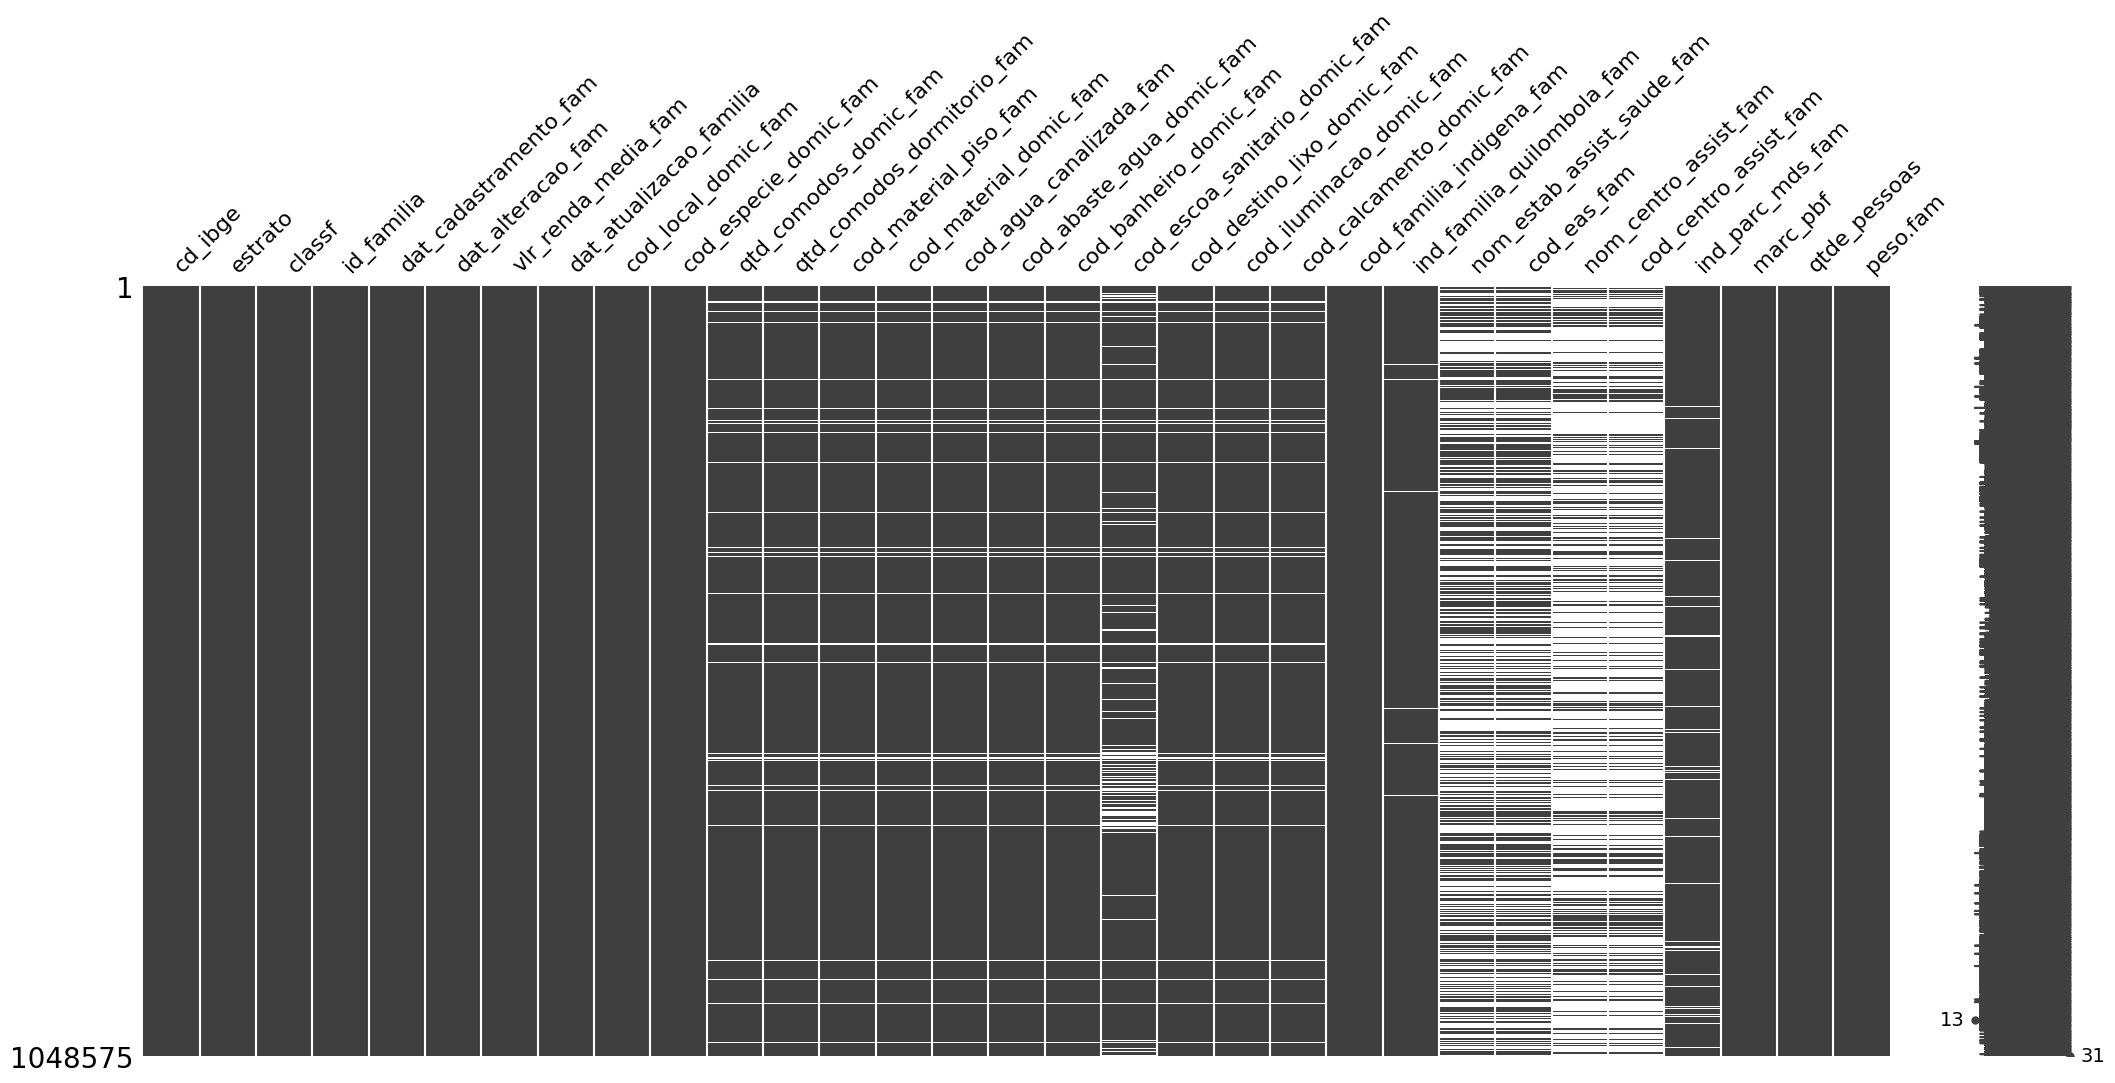

In [28]:
import missingno as msno
import matplotlib.pyplot as plt

# Exibir a matriz de valores faltantes para o df_fam_amostra_mil
def visualizar_valores_faltantes(df_fam):
    msno.matrix(df_fam)
    plt.show()

# Exemplo de uso:
visualizar_valores_faltantes(df_fam)


In [29]:
# Verificar os tipos de dados diferentes na coluna 'id_familia'
tipos_id_familia = df_fam['id_familia'].apply(type).value_counts()

# Exibir os diferentes tipos encontrados e suas respectivas contagens
print(tipos_id_familia)

id_familia
<class 'float'>    1048575
Name: count, dtype: int64


In [30]:
# Verificar quantos valores ausentes existem na coluna 'id_familia'
valores_ausentes = df_fam['id_familia'].isna().sum()
print(f"Número de valores ausentes em 'id_familia': {valores_ausentes}")

Número de valores ausentes em 'id_familia': 0


In [31]:
# Tentar converter id_familia para inteiro, lidando com erros se houver valores que não são convertíveis
try:
    df_fam['id_familia'] = df_fam['id_familia'].astype(int)
    print("Conversão para inteiro realizada com sucesso!")
except ValueError as e:
    print(f"Erro ao converter para inteiro: {e}")

Conversão para inteiro realizada com sucesso!


In [32]:
# Convertendo as colunas para o tipo datetime
df_fam['dat_cadastramento_fam'] = pd.to_datetime(df_fam['dat_cadastramento_fam'], dayfirst=True, errors='coerce')
df_fam['dat_alteracao_fam'] = pd.to_datetime(df_fam['dat_alteracao_fam'], dayfirst=True, errors='coerce')
df_fam['dat_atualizacao_familia'] = pd.to_datetime(df_fam['dat_atualizacao_familia'], dayfirst=True, errors='coerce')

# Verificando se a conversão foi bem-sucedida
print(df_fam[['dat_cadastramento_fam', 'dat_alteracao_fam', 'dat_atualizacao_familia']].dtypes)


dat_cadastramento_fam      datetime64[ns]
dat_alteracao_fam          datetime64[ns]
dat_atualizacao_familia    datetime64[ns]
dtype: object


In [33]:
df_fam = df_fam.drop(columns=['nom_estab_assist_saude_fam','cod_eas_fam','nom_centro_assist_fam','cod_centro_assist_fam'])

In [34]:
df_fam.head()

,cd_ibge,estrato,classf,id_familia,dat_cadastramento_fam,dat_alteracao_fam,vlr_renda_media_fam,dat_atualizacao_familia,cod_local_domic_fam,cod_especie_domic_fam,...,cod_escoa_sanitario_domic_fam,cod_destino_lixo_domic_fam,cod_iluminacao_domic_fam,cod_calcamento_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,ind_parc_mds_fam,marc_pbf,qtde_pessoas,peso.fam
0,3205002,2,2,1,2018-06-28,2018-10-02,244.0,2018-06-28,1.0,1.0,...,1.0,2.0,1.0,1.0,2,2.0,0.0,0,5,"5,50256E+14"
1,3205101,2,2,3,2018-08-27,2018-11-29,60.0,2018-11-29,1.0,1.0,...,1.0,1.0,1.0,1.0,2,2.0,0.0,1,5,"5,50356E+14"
2,3201308,2,2,4,2018-02-23,2018-02-27,937.0,2018-02-23,1.0,1.0,...,1.0,1.0,1.0,3.0,2,2.0,0.0,0,1,"5,5026E+14"
3,3201308,2,2,6,2013-12-27,2018-10-01,44.0,2017-06-22,1.0,1.0,...,1.0,1.0,2.0,3.0,2,2.0,0.0,1,2,"5,5026E+14"
4,3205002,2,2,7,2018-03-26,2018-03-28,0.0,2018-03-26,1.0,1.0,...,5.0,3.0,1.0,3.0,2,2.0,0.0,1,2,"5,50256E+14"


In [35]:
# Criando a coluna 'uf_ibge' com os dois primeiros dígitos de 'cd_ibge' e inserindo logo após 'cd_ibge'
df_fam.insert(df_fam.columns.get_loc('cd_ibge') + 1, 'uf_ibge', df_fam['cd_ibge'].astype(str).str[:2])

# Criando um dicionário para mapear as UFs para suas respectivas regiões
regioes = {
    '1': 'N',   # Norte
    '2': 'NE',  # Nordeste
    '3': 'SE',  # Sudeste
    '4': 'S',   # Sul
    '5': 'CO'   # Centro-Oeste
}

# Criando a coluna 'regiao_ibge' e inserindo após 'uf_ibge'
df_fam.insert(df_fam.columns.get_loc('uf_ibge') + 1, 'regiao_ibge', df_fam['uf_ibge'].str[0].map(regioes))

# Criando a coluna 'municipio_ibge' com os próximos quatro dígitos de 'cd_ibge' e inserindo após 'regiao_ibge'
df_fam.insert(df_fam.columns.get_loc('regiao_ibge') + 1, 'municipio_ibge', df_fam['cd_ibge'].astype(str).str[2:6])

# Criando a coluna 'verificador_ibge' com o último dígito de 'cd_ibge' e inserindo após 'municipio_ibge'
df_fam.insert(df_fam.columns.get_loc('municipio_ibge') + 1, 'verificador_ibge', df_fam['cd_ibge'].astype(str).str[-1])

# Exibindo as primeiras linhas do dataframe para verificar o resultado
df_fam.head()



,cd_ibge,uf_ibge,regiao_ibge,municipio_ibge,verificador_ibge,estrato,classf,id_familia,dat_cadastramento_fam,dat_alteracao_fam,...,cod_escoa_sanitario_domic_fam,cod_destino_lixo_domic_fam,cod_iluminacao_domic_fam,cod_calcamento_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,ind_parc_mds_fam,marc_pbf,qtde_pessoas,peso.fam
0,3205002,32,SE,0500,2,2,2,1,2018-06-28,2018-10-02,...,1.0,2.0,1.0,1.0,2,2.0,0.0,0,5,"5,50256E+14"
1,3205101,32,SE,0510,1,2,2,3,2018-08-27,2018-11-29,...,1.0,1.0,1.0,1.0,2,2.0,0.0,1,5,"5,50356E+14"
2,3201308,32,SE,0130,8,2,2,4,2018-02-23,2018-02-27,...,1.0,1.0,1.0,3.0,2,2.0,0.0,0,1,"5,5026E+14"
3,3201308,32,SE,0130,8,2,2,6,2013-12-27,2018-10-01,...,1.0,1.0,2.0,3.0,2,2.0,0.0,1,2,"5,5026E+14"
4,3205002,32,SE,0500,2,2,2,7,2018-03-26,2018-03-28,...,5.0,3.0,1.0,3.0,2,2.0,0.0,1,2,"5,50256E+14"


In [36]:
# Criar uma nova coluna 'classe_renda' com base em 'vlr_renda_media_fam'
# em 2018 o SM era de 954,00 e pobreza para o PBF era até 178.00
def categorizar_renda(df):
    df_fam['classe_renda'] = pd.cut(df_fam['vlr_renda_media_fam'],
                                bins=[-float('inf'), 178.0, 477.0, float('inf')],
                                labels=[1, 2, 3],
                                right=True)  # Inclui o limite superior no intervalo

# Exemplo de uso:
categorizar_renda(df_fam)

# Visualizando as primeiras linhas para conferir
print(df_fam[['vlr_renda_media_fam', 'classe_renda']].head())


   vlr_renda_media_fam classe_renda
0                244.0            2
1                 60.0            1
2                937.0            3
3                 44.0            1
4                  0.0            1


In [37]:
df_fam.shape

(1048575, 32)

In [38]:
df_fam_amostra_100mil = df_fam.sample(n=100000, random_state=42)

In [39]:
df_fam_amostra_100mil.shape

(100000, 32)

In [40]:
# Salvando a amostra de 1.000 linhas no arquivo CSV
df_fam_amostra_100mil.to_csv('df_fam_amostra_100mil', index=False)

# Base de dados pessoas

In [49]:
# Load the datasets
df_pessoas = pd.read_csv('Bases originais/base_amostra_pessoa_201812.csv', sep=';')

In [50]:
df_pessoas.tail()

,cd_ibge,estrato,classf,id_familia,id_pessoa,cod_sexo_pessoa,idade,cod_parentesco_rf_pessoa,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,...,cod_trabalho_12_meses_memb,qtd_meses_12_meses_memb,val_renda_bruta_12_meses_memb,val_renda_doacao_memb,val_renda_aposent_memb,val_renda_seguro_desemp_memb,val_renda_pensao_alimen_memb,val_outras_rendas_memb,peso.fam,peso.pes
1048570,3131703,2,3,2575954.0,1048571.0,2,0,3,1.0,1.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,"5,5034E+14","5,63245E+14"
1048571,3550308,2,1,5140544.0,1048572.0,2,45,2,1.0,3.0,...,2.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,"5,50244E+14","5,63276E+14"
1048572,1716109,2,3,406259.0,1048573.0,1,3,3,4.0,1.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,"5,50338E+14","5,63276E+14"
1048573,2311405,2,3,3093513.0,1048574.0,2,19,1,4.0,1.0,...,2.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,"5,50245E+14","5,63287E+14"
1048574,4103602,1,3,985523.0,1048575.0,2,44,1,4.0,1.0,...,1.0,6.0,2400.0,0.0,0.0,0.0,0.0,0.0,"5,50243E+14","5,63276E+14"


In [51]:
df_pessoas.shape

(1048575, 35)

In [52]:
df_pessoas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 35 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   cd_ibge                           1048575 non-null  int64  
 1   estrato                           1048575 non-null  int64  
 2   classf                            1048575 non-null  int64  
 3   id_familia                        1048575 non-null  float64
 4   id_pessoa                         1048575 non-null  float64
 5   cod_sexo_pessoa                   1048575 non-null  int64  
 6   idade                             1048575 non-null  int64  
 7   cod_parentesco_rf_pessoa          1048575 non-null  int64  
 8   cod_raca_cor_pessoa               1048150 non-null  float64
 9   cod_local_nascimento_pessoa       1044114 non-null  float64
 10  cod_certidao_registrada_pessoa    1048575 non-null  int64  
 11  cod_deficiencia_memb              104

In [53]:
# Verificar os tipos de dados diferentes na coluna 'id_familia'
tipos_id_familia = df_pessoas['id_familia'].apply(type).value_counts()

# Exibir os diferentes tipos encontrados e suas respectivas contagens
print(tipos_id_familia)


id_familia
<class 'float'>    1048575
Name: count, dtype: int64


In [54]:
# Verificar quantos valores ausentes existem na coluna 'id_familia'
valores_ausentes = df_pessoas['id_familia'].isna().sum()
print(f"Número de valores ausentes em 'id_familia': {valores_ausentes}")



Número de valores ausentes em 'id_familia': 0


In [55]:
# Tentar converter id_familia para inteiro, lidando com erros se houver valores que não são convertíveis
try:
    df_pessoas['id_familia'] = df_pessoas['id_familia'].astype(int)
    print("Conversão para inteiro realizada com sucesso!")
except ValueError as e:
    print(f"Erro ao converter para inteiro: {e}")

Conversão para inteiro realizada com sucesso!


In [56]:
# Tentar converter id_pessoa para inteiro, lidando com erros se houver valores que não são convertíveis
try:
    df_pessoas['id_pessoa'] = df_pessoas['id_pessoa'].astype(int)
    print("Conversão para inteiro realizada com sucesso!")
except ValueError as e:
    print(f"Erro ao converter para inteiro: {e}")

Conversão para inteiro realizada com sucesso!


In [57]:
# Passo 1: Substituir vírgulas por pontos e remover valores em notação científica, convertendo-os para inteiros
df_pessoas['id_pessoa'] = df_pessoas['id_pessoa'].astype(str)  # Garantir que a coluna seja string para manipulação
df_pessoas['id_pessoa'] = df_pessoas['id_pessoa'].str.replace(',', '')  # Remover vírgulas
df_pessoas['id_pessoa'] = df_pessoas['id_pessoa'].str.extract('(\d+)')  # Extrair apenas dígitos

# Passo 2: Tratar valores ausentes e convertê-los
df_pessoas['id_pessoa'] = df_pessoas['id_pessoa'].fillna(0)  # Preencher valores ausentes com 0 ou outro valor
df_pessoas['id_pessoa'] = df_pessoas['id_pessoa'].astype(int)  # Converter para inteiro

# Verificar se a conversão foi bem-sucedida
print(df_pessoas['id_pessoa'].head())


0    1
1    2
2    3
3    4
4    5
Name: id_pessoa, dtype: int32


In [58]:
df_pessoas.shape

(1048575, 35)

In [59]:
df_pessoas.tail()

,cd_ibge,estrato,classf,id_familia,id_pessoa,cod_sexo_pessoa,idade,cod_parentesco_rf_pessoa,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,...,cod_trabalho_12_meses_memb,qtd_meses_12_meses_memb,val_renda_bruta_12_meses_memb,val_renda_doacao_memb,val_renda_aposent_memb,val_renda_seguro_desemp_memb,val_renda_pensao_alimen_memb,val_outras_rendas_memb,peso.fam,peso.pes
1048570,3131703,2,3,2575954,1048571,2,0,3,1.0,1.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,"5,5034E+14","5,63245E+14"
1048571,3550308,2,1,5140544,1048572,2,45,2,1.0,3.0,...,2.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,"5,50244E+14","5,63276E+14"
1048572,1716109,2,3,406259,1048573,1,3,3,4.0,1.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,"5,50338E+14","5,63276E+14"
1048573,2311405,2,3,3093513,1048574,2,19,1,4.0,1.0,...,2.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,"5,50245E+14","5,63287E+14"
1048574,4103602,1,3,985523,1048575,2,44,1,4.0,1.0,...,1.0,6.0,2400.0,0.0,0.0,0.0,0.0,0.0,"5,50243E+14","5,63276E+14"


In [60]:
# Passo 1: Obter os valores únicos da coluna 'id_familia' do DataFrame amostra_1000
familias_amostra = df_fam_amostra_100mil['id_familia'].unique()

# Passo 2: Filtrar o df_pessoas para manter apenas as linhas com id_familia presentes na amostra_1000
df_pessoas_amostra_100mil = df_pessoas[df_pessoas['id_familia'].isin(familias_amostra)]

# Verificar o tamanho da amostra de pessoas
print(df_pessoas_amostra_100mil.shape)


(22563, 35)


In [61]:
df_pessoas_amostra_100mil.head()

,cd_ibge,estrato,classf,id_familia,id_pessoa,cod_sexo_pessoa,idade,cod_parentesco_rf_pessoa,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,...,cod_trabalho_12_meses_memb,qtd_meses_12_meses_memb,val_renda_bruta_12_meses_memb,val_renda_doacao_memb,val_renda_aposent_memb,val_renda_seguro_desemp_memb,val_renda_pensao_alimen_memb,val_outras_rendas_memb,peso.fam,peso.pes
26,5220603,1,3,594592,27,2,32,1,4.0,2.0,...,1.0,12.0,3600.0,0.0,0.0,0.0,0.0,0.0,"5,50245E+14","5,63277E+14"
33,3301009,2,3,234609,34,2,63,1,1.0,1.0,...,2.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,"5,50237E+14","5,63279E+14"
201,4314506,1,3,936165,202,1,0,5,4.0,2.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,"5,50244E+14","5,63277E+14"
224,3536703,1,3,1151564,225,2,7,3,1.0,1.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,"5,50246E+14","5,63276E+14"
230,4109609,2,3,1009620,231,2,3,3,1.0,1.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,"5,50165E+14","5,63246E+14"


In [62]:
# Salvando a amostra de pessoas a partir do id_familia o arquivo no arquivo CSV
df_pessoas_amostra_100mil.to_csv('df_pessoas_amostra_100mil', index=False)

In [63]:
# Juntando os dois DataFrames pela coluna 'id_familia'
df_fam_pessoas_amostra_100mil = pd.merge(df_fam_amostra_100mil, df_pessoas_amostra_100mil, on='id_familia', how='inner')

# Verificando o DataFrame resultante
print(df_fam_pessoas_amostra_100mil.shape)


(22563, 66)


In [64]:
df_fam_pessoas_amostra_100mil.head()

,cd_ibge_x,uf_ibge,regiao_ibge,municipio_ibge,verificador_ibge,estrato_x,classf_x,id_familia,dat_cadastramento_fam,dat_alteracao_fam,...,cod_trabalho_12_meses_memb,qtd_meses_12_meses_memb,val_renda_bruta_12_meses_memb,val_renda_doacao_memb,val_renda_aposent_memb,val_renda_seguro_desemp_memb,val_renda_pensao_alimen_memb,val_outras_rendas_memb,peso.fam_y,peso.pes
0,3543907,35,SE,4390,7,2,3,1049497,2011-07-12,2018-09-30,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,"5,50286E+14","5,63244E+14"
1,3543907,35,SE,4390,7,2,3,1049497,2011-07-12,2018-09-30,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,"5,50286E+14","5,63244E+14"
2,4317509,43,S,1750,9,2,3,871451,2006-09-16,2018-09-30,...,1.0,10.0,1800.0,0.0,0.0,0.0,0.0,0.0,"5,50169E+14","5,63332E+14"
3,5107305,51,CO,0730,5,1,3,438528,2006-11-20,2018-09-30,...,2.0,NaN,NaN,0.0,0.0,0.0,0.0,150.0,"5,5024E+14","5,63277E+13"
4,2112209,21,NE,1220,9,2,2,21480,2014-08-06,2018-10-01,...,1.0,12.0,10560.0,0.0,0.0,0.0,0.0,0.0,"5,5026E+14","5,63271E+14"


In [65]:
df_fam_pessoas_amostra_100mil.columns

Index(['cd_ibge_x', 'uf_ibge', 'regiao_ibge', 'municipio_ibge',
       'verificador_ibge', 'estrato_x', 'classf_x', 'id_familia',
       'dat_cadastramento_fam', 'dat_alteracao_fam', 'vlr_renda_media_fam',
       'dat_atualizacao_familia', 'cod_local_domic_fam',
       'cod_especie_domic_fam', 'qtd_comodos_domic_fam',
       'qtd_comodos_dormitorio_fam', 'cod_material_piso_fam',
       'cod_material_domic_fam', 'cod_agua_canalizada_fam',
       'cod_abaste_agua_domic_fam', 'cod_banheiro_domic_fam',
       'cod_escoa_sanitario_domic_fam', 'cod_destino_lixo_domic_fam',
       'cod_iluminacao_domic_fam', 'cod_calcamento_domic_fam',
       'cod_familia_indigena_fam', 'ind_familia_quilombola_fam',
       'ind_parc_mds_fam', 'marc_pbf', 'qtde_pessoas', 'peso.fam_x',
       'classe_renda', 'cd_ibge_y', 'estrato_y', 'classf_y', 'id_pessoa',
       'cod_sexo_pessoa', 'idade', 'cod_parentesco_rf_pessoa',
       'cod_raca_cor_pessoa', 'cod_local_nascimento_pessoa',
       'cod_certidao_registrada

In [66]:
# Salvando a amostra completa fam_pessoa no arquivo CSV
df_fam_pessoas_amostra_100mil.to_csv('df_fam_pessoas_amostra_100mil', index=False)